In [8]:
import  numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("gov-data-final.csv")

In [3]:
data.head()

,S No.,Year,State,Industry,Count,Last Update
0,1,2024,Assam,Advertising,2,2025-02-28 01:00:01.383
1,2,2024,Assam,Architecture Interior Design,1,2025-02-28 01:00:01.673
2,3,2024,Assam,Automotive,3,2025-02-28 01:00:02.266
3,4,2024,Assam,Chemicals,3,2025-02-28 01:00:03.168
4,5,2024,Assam,Telecommunication & Networking,2,2025-02-28 01:00:03.767


In [4]:
data = data.drop("Last Update", axis = 1)

In [5]:
data.head()

,S No.,Year,State,Industry,Count
0,1,2024,Assam,Advertising,2
1,2,2024,Assam,Architecture Interior Design,1
2,3,2024,Assam,Automotive,3
3,4,2024,Assam,Chemicals,3
4,5,2024,Assam,Telecommunication & Networking,2


In [6]:
# Pre-COVID: 2016-2019
pre_covid = data[(data['Year'] >= 2016) & (data['Year'] <= 2019)]

# During COVID: 2020-2021
during_covid = data[(data['Year'] >= 2020) & (data['Year'] <= 2021)]

# Post-COVID: 2022-2024
post_covid = data[(data['Year'] >= 2022) & (data['Year'] <= 2024)]

# Confirm the split
print("Pre-COVID records:", pre_covid.shape)
print("During COVID records:", during_covid.shape)
print("Post-COVID records:", post_covid.shape)


Pre-COVID records: (2597, 5)
During COVID records: (2202, 5)
Post-COVID records: (3777, 5)


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\2649211738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_trend.values, y=industry_trend.index, palette='coolwarm')


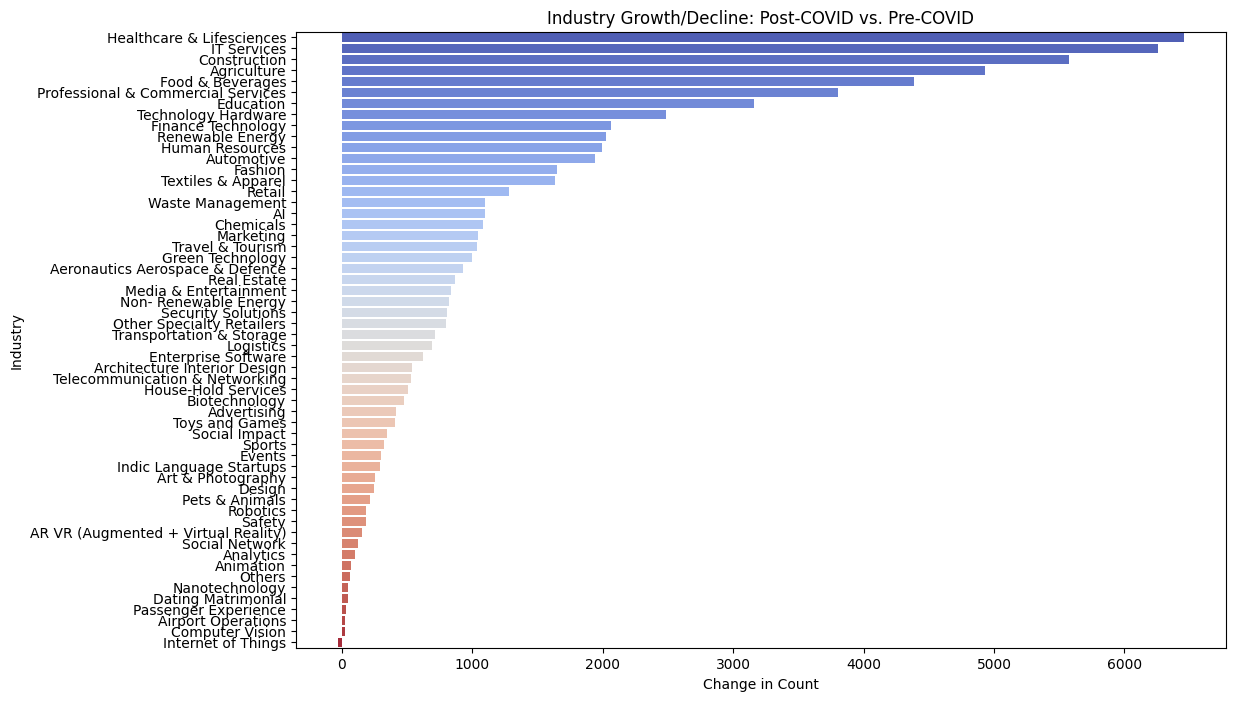

In [9]:
# Industry counts in each period
pre_covid_counts = pre_covid.groupby('Industry')['Count'].sum()
post_covid_counts = post_covid.groupby('Industry')['Count'].sum()

# Percentage change in industry counts
industry_trend = post_covid_counts.subtract(pre_covid_counts, fill_value=0)
industry_trend = industry_trend.sort_values(ascending=False)

# Visualize growth and decline
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_trend.values, y=industry_trend.index, palette='coolwarm')
plt.title('Industry Growth/Decline: Post-COVID vs. Pre-COVID')
plt.xlabel('Change in Count')
plt.ylabel('Industry')
plt.show()


In [ ]:
print("Top 10 Booming Industries After COVID:")
print(industry_trend.nlargest(10))

Top 5 Booming Industries After COVID:
Industry
Healthcare & Lifesciences             6454.0
IT Services                           6260.0
Construction                          5573.0
Agriculture                           4931.0
Food & Beverages                      4385.0
Professional & Commercial Services    3804.0
Education                             3156.0
Technology Hardware                   2488.0
Finance Technology                    2063.0
Renewable Energy                      2021.0
Name: Count, dtype: float64


In [ ]:
print("Top 10 Declining Industries After COVID:")
print(industry_trend.nsmallest(10))


Top 5 Declining Industries After COVID:
Industry
Internet of Things      -29.0
Airport Operations       21.0
Computer Vision          21.0
Passenger Experience     28.0
Dating Matrimonial       44.0
Nanotechnology           46.0
Others                   60.0
Animation                69.0
Analytics                97.0
Social Network          122.0
Name: Count, dtype: float64


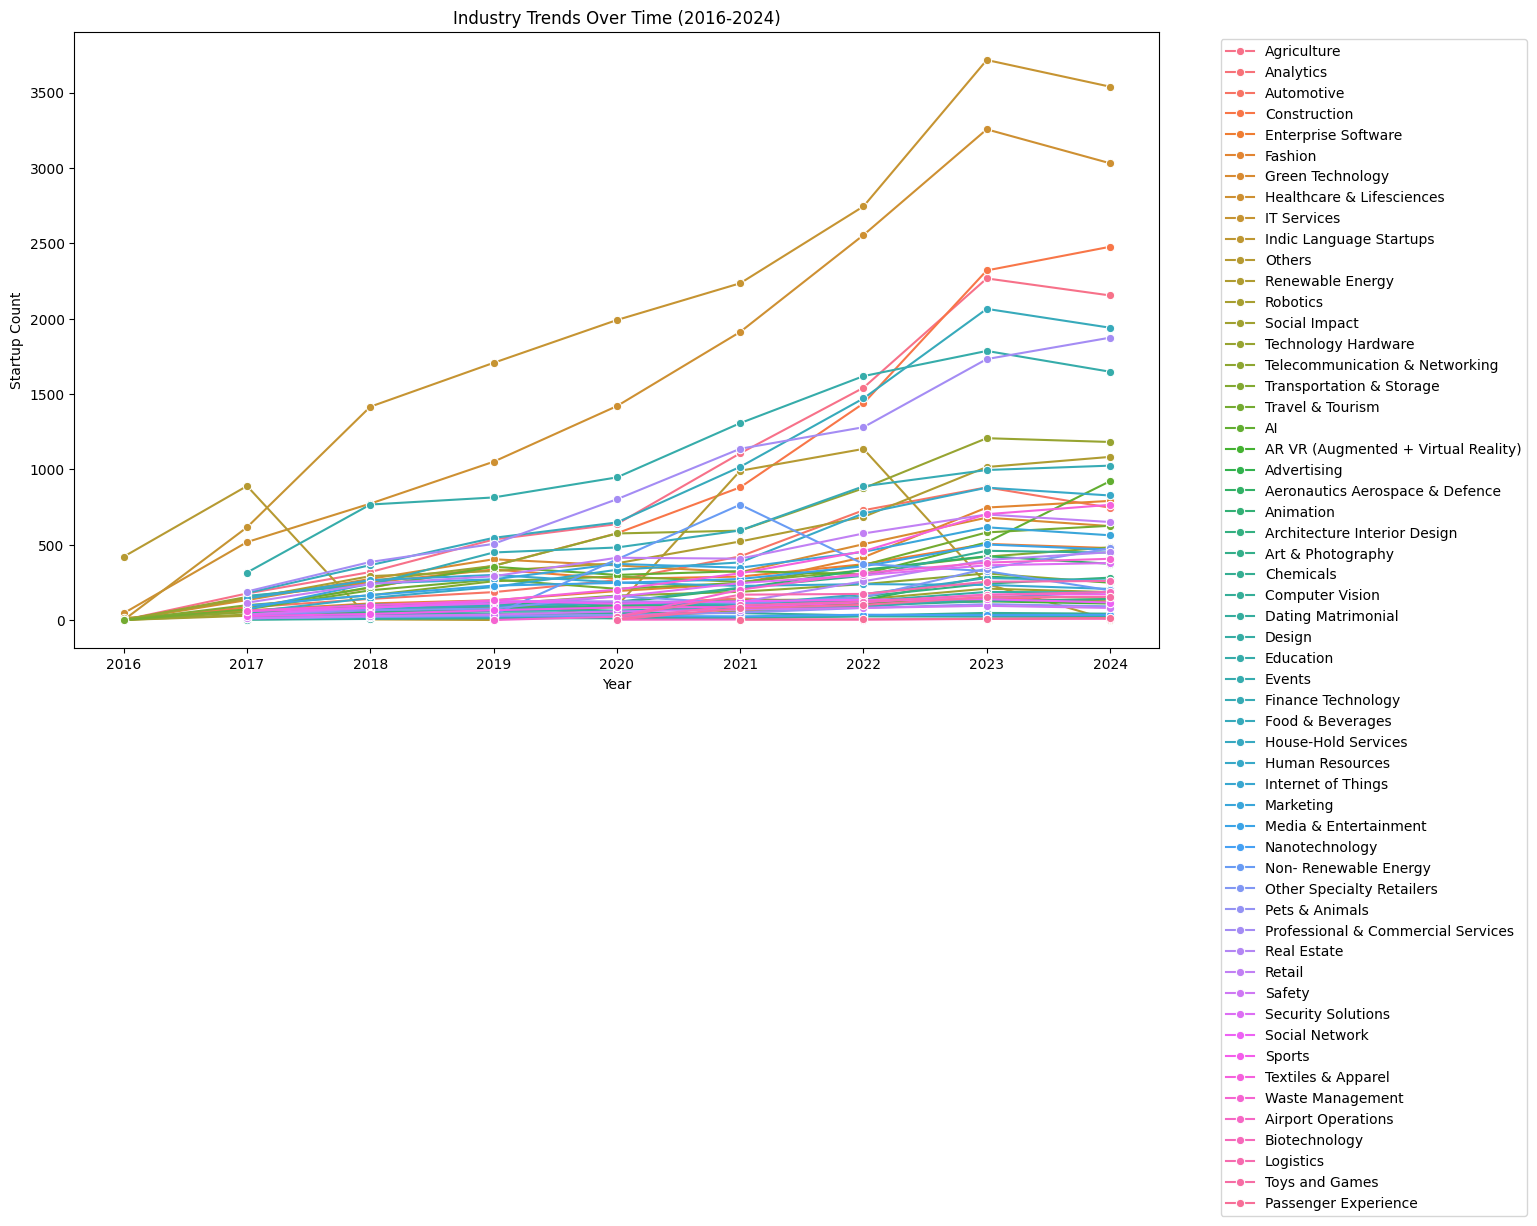

In [14]:
# Industry trends over time
industry_over_time = data.groupby(['Year', 'Industry'])['Count'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Count', hue='Industry', data=industry_over_time, marker='o')
plt.title('Industry Trends Over Time (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Startup Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\3607142559.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_booming['Change'], y=top_10_booming.index, palette='Blues_r')
C:\Users\somya\AppData\Local\Temp\ipykernel_16284\3607142559.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_declining['Change'], y=top_10_declining.index, palette='Reds_r')


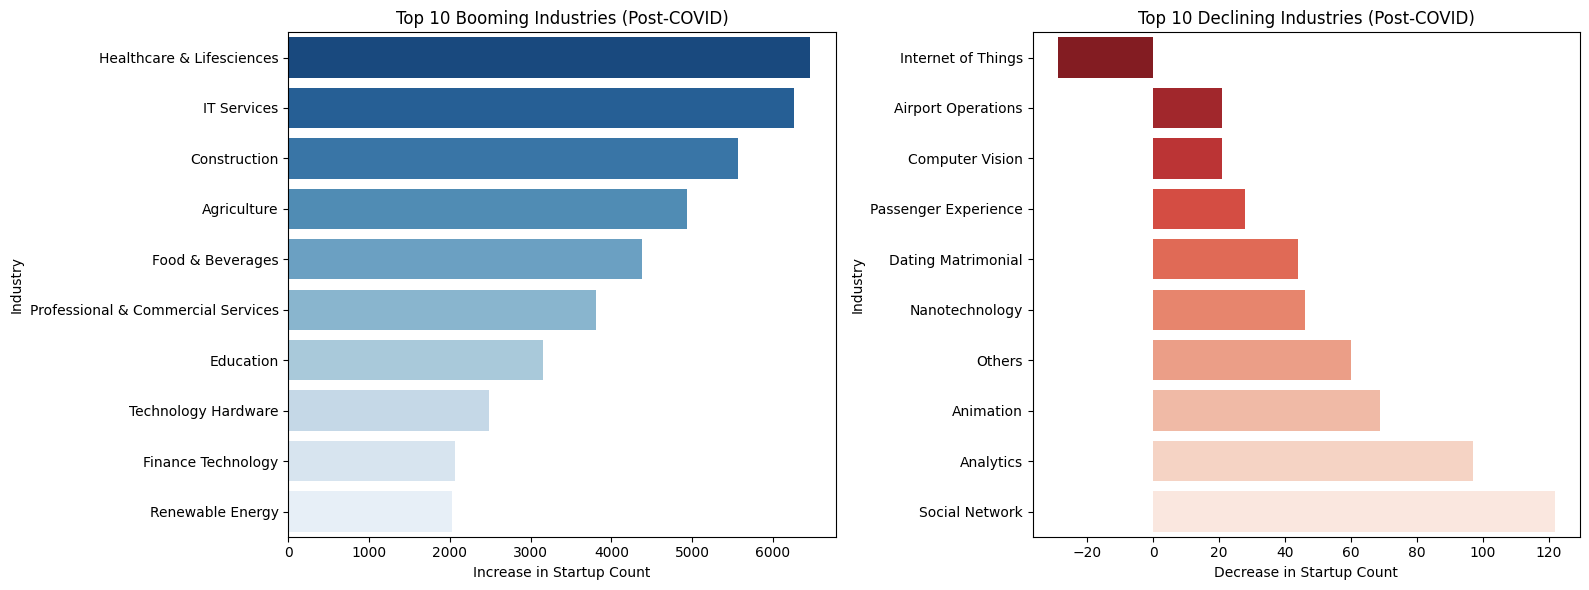

In [16]:
# Top 10 industries that grew the most
top_10_booming = industry_change.nlargest(10, 'Change')
top_10_declining = industry_change.nsmallest(10, 'Change')

# Plot both booming and declining industries
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_booming['Change'], y=top_10_booming.index, palette='Blues_r')
plt.title('Top 10 Booming Industries (Post-COVID)')
plt.xlabel('Increase in Startup Count')

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_declining['Change'], y=top_10_declining.index, palette='Reds_r')
plt.title('Top 10 Declining Industries (Post-COVID)')
plt.xlabel('Decrease in Startup Count')

plt.tight_layout()
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\3734766585.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_change['Change'], y=state_change.index, palette='viridis')


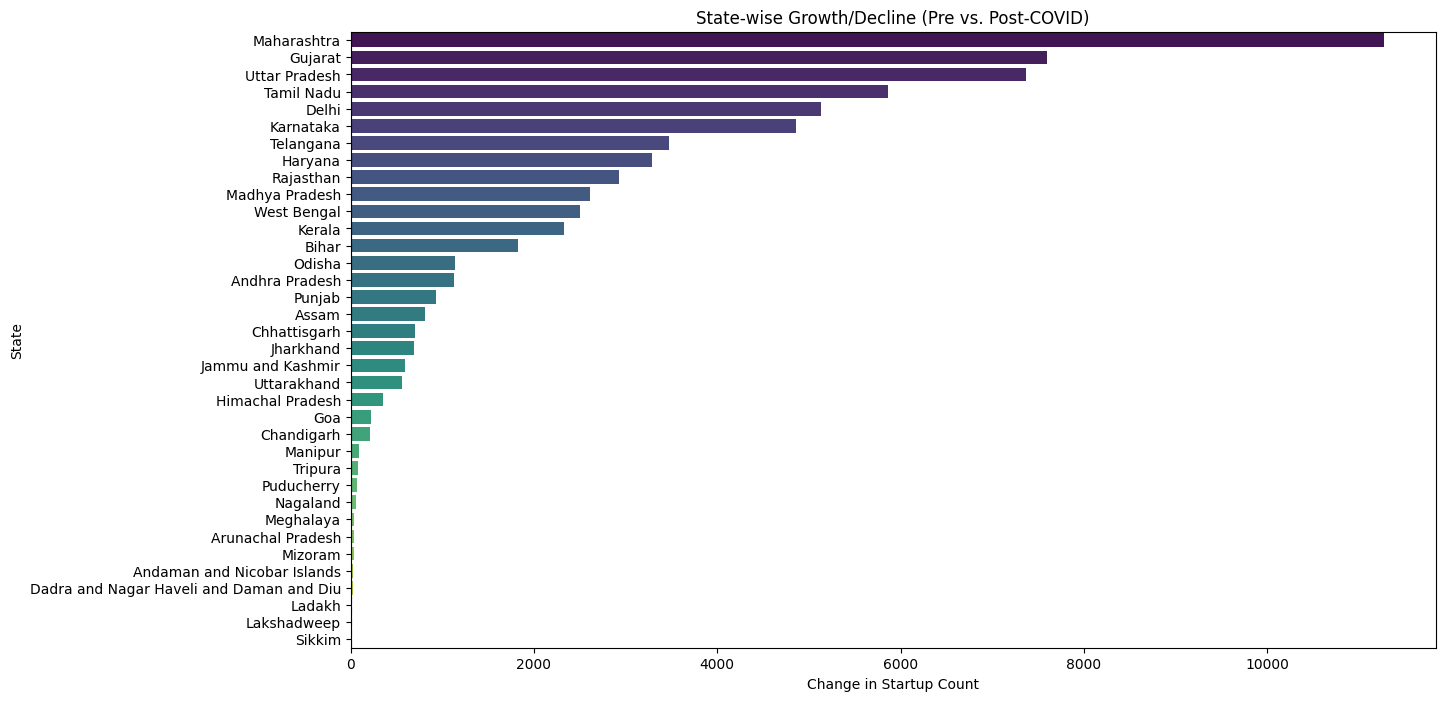

In [17]:
# State-wise startup counts before and after COVID
pre_covid_states = pre_covid.groupby('State')['Count'].sum()
post_covid_states = post_covid.groupby('State')['Count'].sum()

# Create a comparison DataFrame
state_change = pd.DataFrame({'Pre-COVID': pre_covid_states, 'Post-COVID': post_covid_states}).fillna(0)
state_change['Change'] = state_change['Post-COVID'] - state_change['Pre-COVID']

# Plot the state-wise growth/decline
plt.figure(figsize=(14, 8))
state_change.sort_values('Change', ascending=False, inplace=True)
sns.barplot(x=state_change['Change'], y=state_change.index, palette='viridis')
plt.title('State-wise Growth/Decline (Pre vs. Post-COVID)')
plt.xlabel('Change in Startup Count')
plt.ylabel('State')
plt.axvline(0, color='black', linestyle='--')
plt.show()

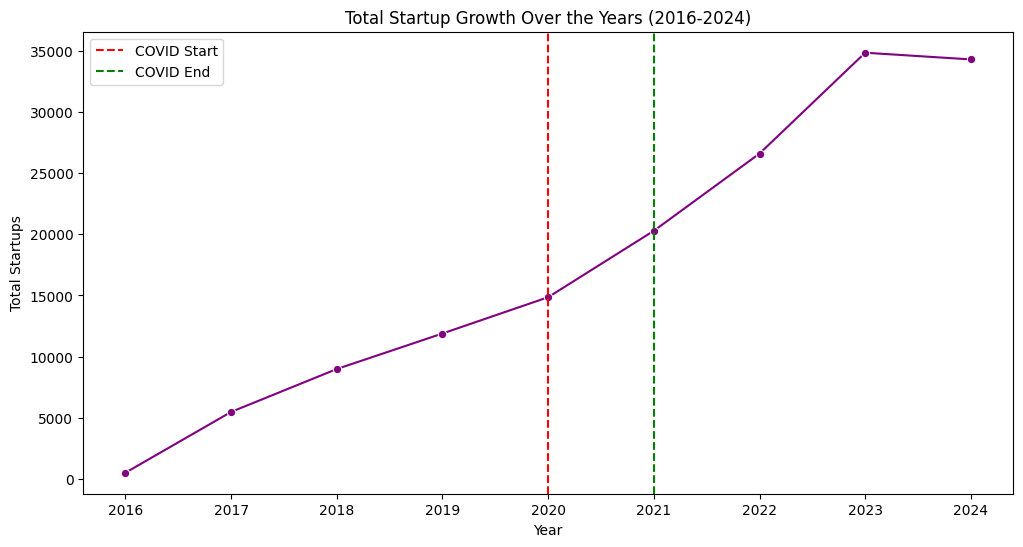

In [18]:
# Yearly total startup counts
yearly_counts = data.groupby('Year')['Count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=yearly_counts, marker='o', color='purple')
plt.axvline(2020, color='red', linestyle='--', label='COVID Start')
plt.axvline(2021, color='green', linestyle='--', label='COVID End')
plt.title('Total Startup Growth Over the Years (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Total Startups')
plt.legend()
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\3294939405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=covid_counts.values, y=covid_counts.index, palette='crest')


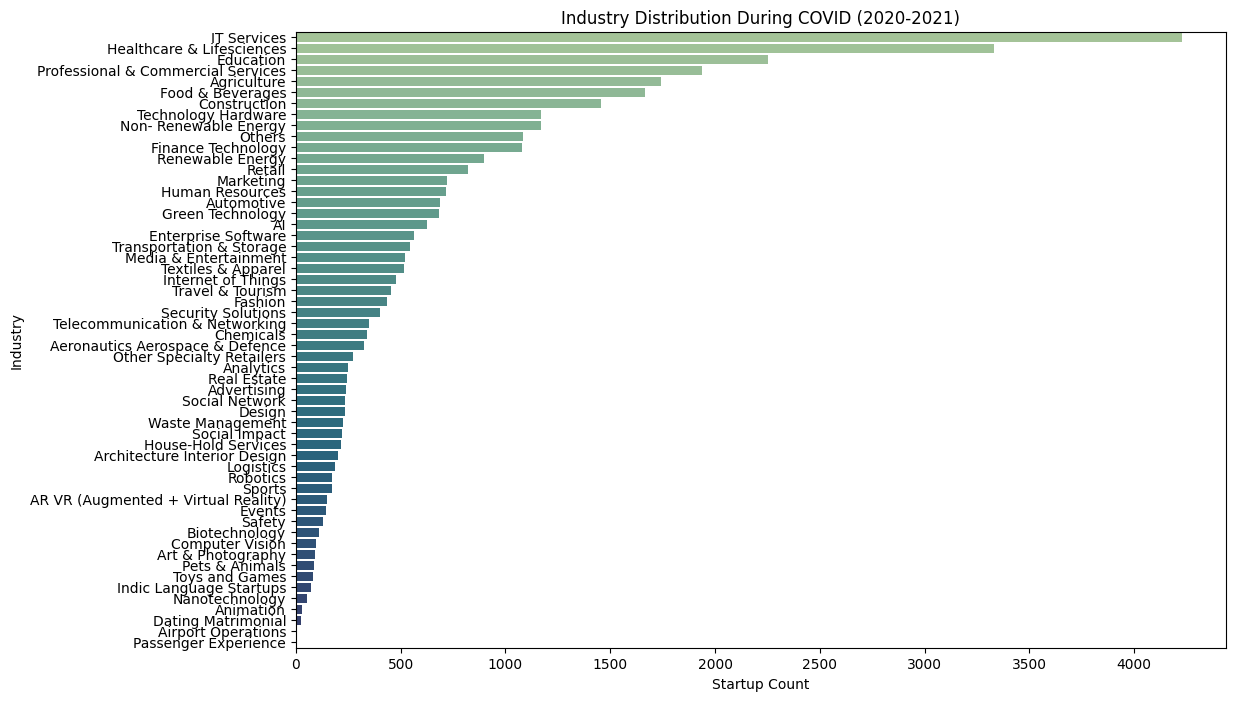

In [21]:
# Industry counts during COVID (2020-2021)
covid_counts = during_covid.groupby('Industry')['Count'].sum().sort_values(ascending=False)

# Plot Industry Distribution During COVID
plt.figure(figsize=(12, 8))
sns.barplot(x=covid_counts.values, y=covid_counts.index, palette='crest')
plt.title('Industry Distribution During COVID (2020-2021)')
plt.xlabel('Startup Count')
plt.ylabel('Industry')
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\2234252683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_covid.values, y=top_10_covid.index, palette='mako')


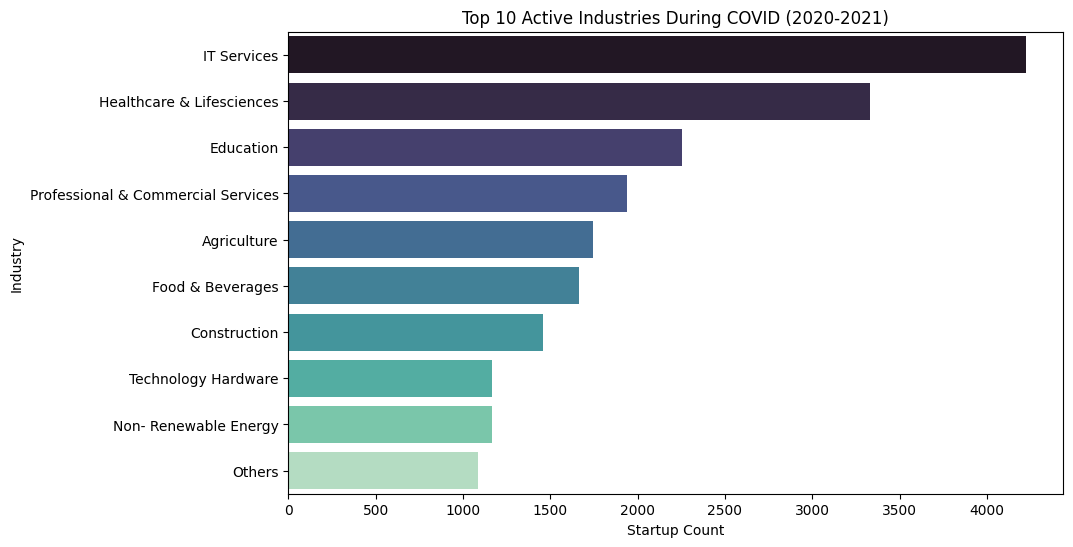

In [22]:
# Top 10 active industries during COVID
top_10_covid = covid_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_covid.values, y=top_10_covid.index, palette='mako')
plt.title('Top 10 Active Industries During COVID (2020-2021)')
plt.xlabel('Startup Count')
plt.ylabel('Industry')
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\2850780498.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pre_vs_during['Change'], y=pre_vs_during.index, palette='coolwarm')


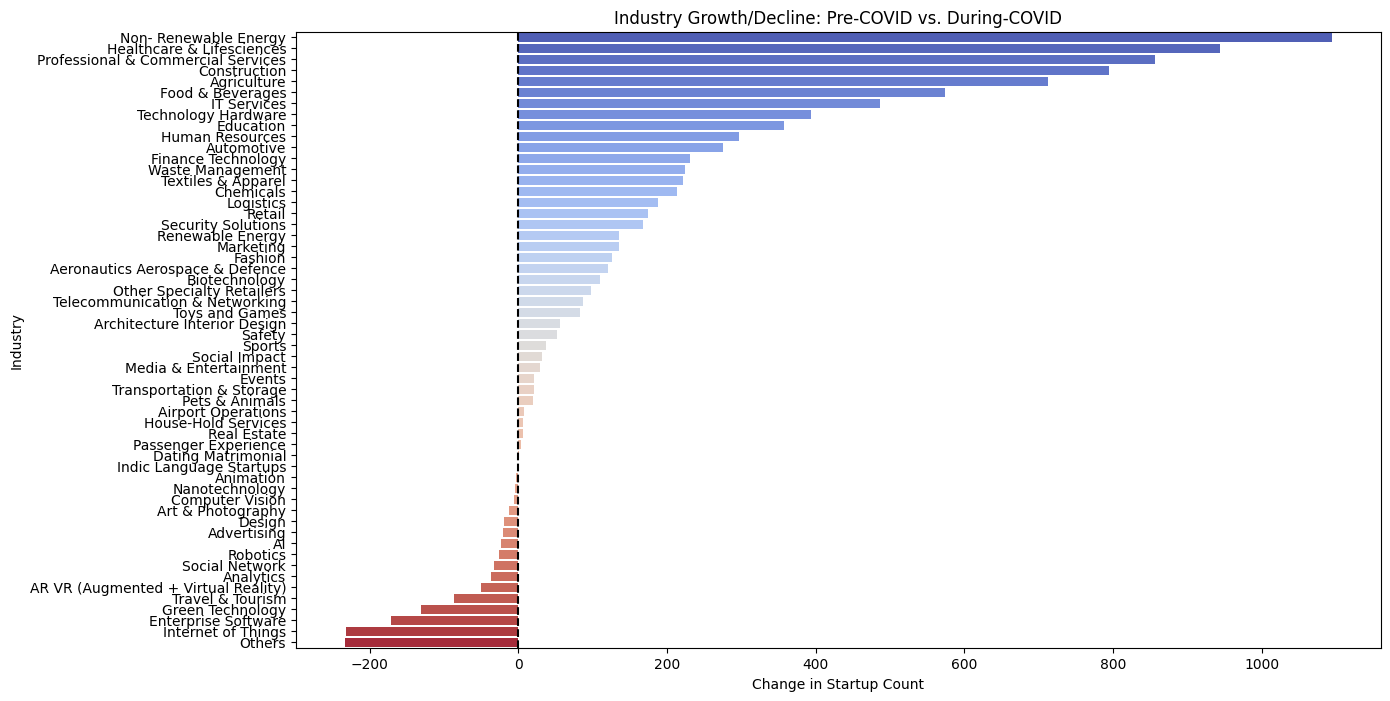

In [23]:
# Industry counts before and during COVID
pre_vs_during = pd.DataFrame({'Pre-COVID': pre_covid.groupby('Industry')['Count'].sum(),
                              'During-COVID': during_covid.groupby('Industry')['Count'].sum()}).fillna(0)

# Industry change during COVID
pre_vs_during['Change'] = pre_vs_during['During-COVID'] - pre_vs_during['Pre-COVID']

# Visualize Industry Growth/Decline
plt.figure(figsize=(14, 8))
pre_vs_during.sort_values('Change', ascending=False, inplace=True)
sns.barplot(x=pre_vs_during['Change'], y=pre_vs_during.index, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Industry Growth/Decline: Pre-COVID vs. During-COVID')
plt.xlabel('Change in Startup Count')
plt.ylabel('Industry')
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\3996639963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=booming_during_covid['Change'], y=booming_during_covid.index, palette='light:b')


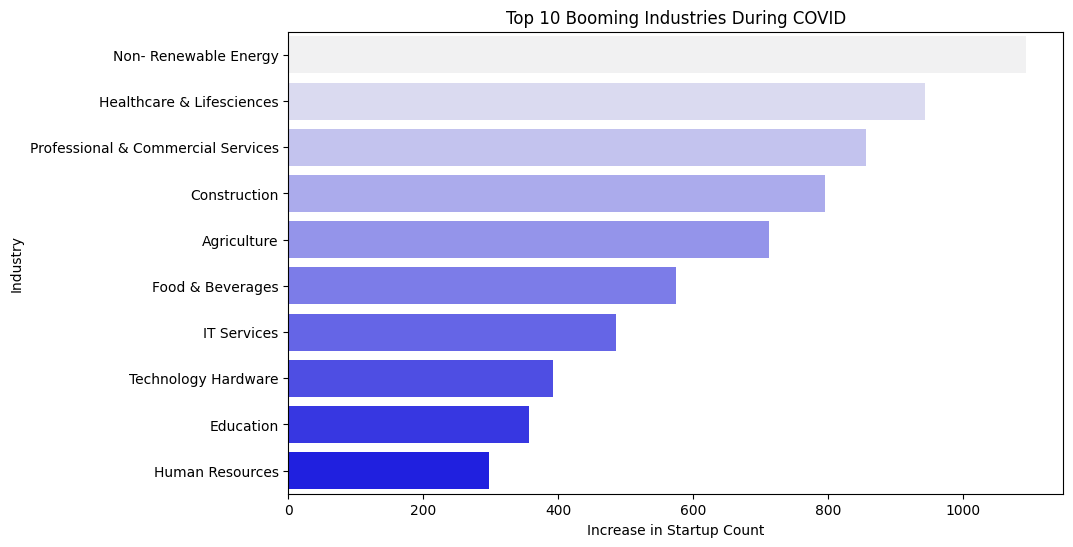

In [25]:
# Top 10 industries with highest growth during COVID
booming_during_covid = pre_vs_during.nlargest(10, 'Change')

plt.figure(figsize=(10, 6))
sns.barplot(x=booming_during_covid['Change'], y=booming_during_covid.index, palette='light:b')
plt.title('Top 10 Booming Industries During COVID')
plt.xlabel('Increase in Startup Count')
plt.ylabel('Industry')
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\2587352622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=declining_during_covid['Change'], y=declining_during_covid.index, palette='rocket')


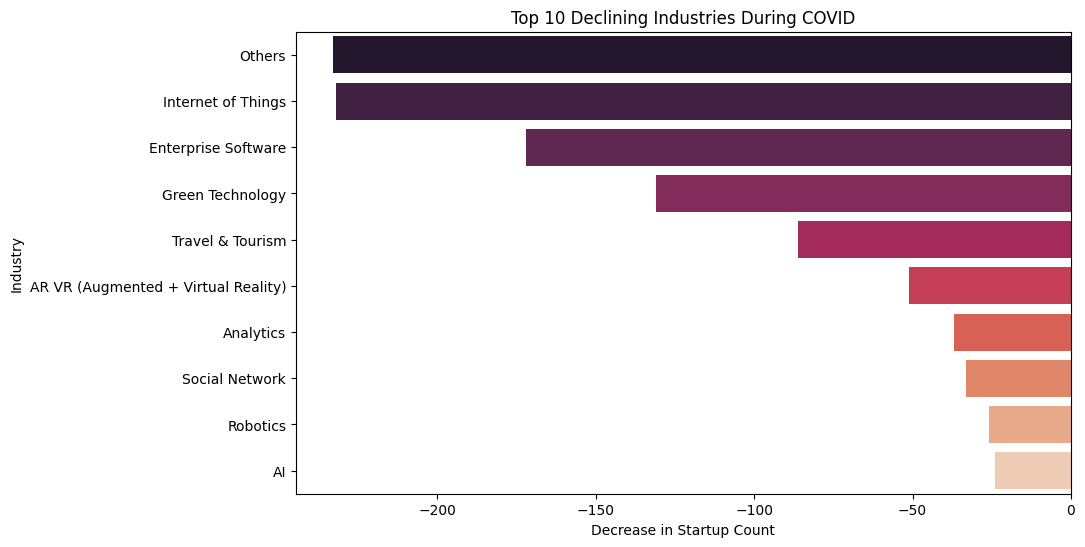

In [26]:
# Top 10 industries with the largest decline during COVID
declining_during_covid = pre_vs_during.nsmallest(10, 'Change')

plt.figure(figsize=(10, 6))
sns.barplot(x=declining_during_covid['Change'], y=declining_during_covid.index, palette='rocket')
plt.title('Top 10 Declining Industries During COVID')
plt.xlabel('Decrease in Startup Count')
plt.ylabel('Industry')
plt.show()

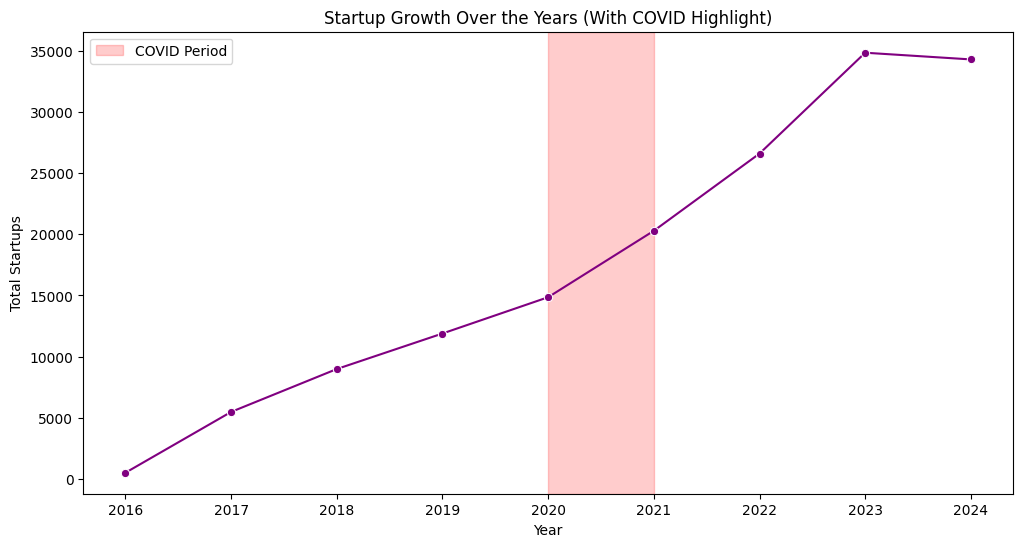

In [27]:
# Yearly startup counts (Highlighting COVID years)
yearly_counts = data.groupby('Year')['Count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=yearly_counts, marker='o', color='purple')
plt.axvspan(2020, 2021, color='red', alpha=0.2, label='COVID Period')
plt.title('Startup Growth Over the Years (With COVID Highlight)')
plt.xlabel('Year')
plt.ylabel('Total Startups')
plt.legend()
plt.show()


C:\Users\somya\AppData\Local\Temp\ipykernel_16284\1948144291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emerging_covid.values, y=emerging_covid.index, palette='flare')


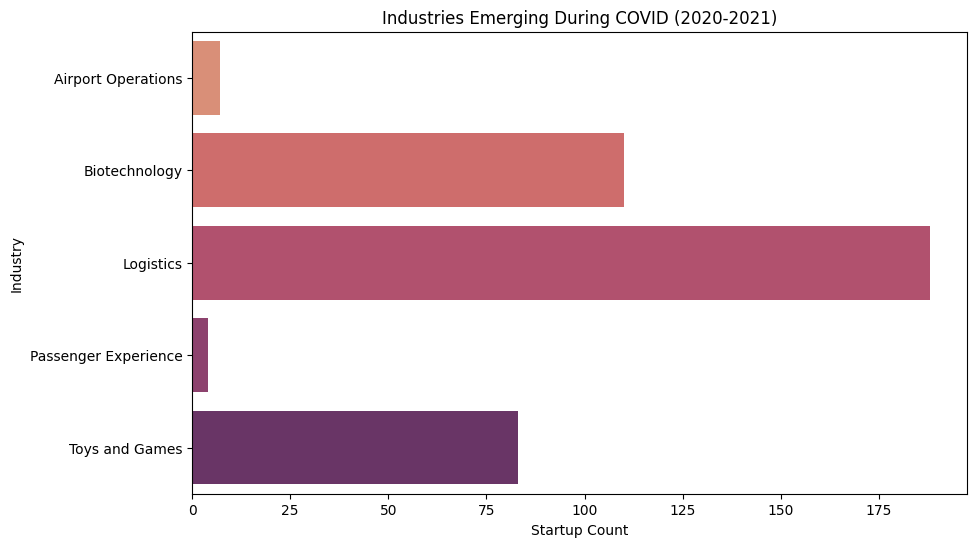

In [ ]:
# Industries that only appeared during COVID
emerging_covid = during_covid[~during_covid['Industry'].isin(pre_covid['Industry'])].groupby('Industry')['Count'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=emerging_covid.values, y=emerging_covid.index, palette='flare')
plt.title('Industries Emerging During COVID (2020-2021)')
plt.xlabel('Startup Count')
plt.ylabel('Industry')
plt.show()
